In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd

import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from fig_params import fig_params;fig_params()
import seaborn as sns
sns.set_style(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

import matplotlib as mpl
linewidth_default = 2.0
fig_text_default = 18.
fig_title_default = fig_text_default*1.5
plt.rc('lines', linewidth=linewidth_default)    
plt.rc('text', usetex=False)
plt.rc('font', size=fig_text_default, weight='normal',family='sans-serif')
plt.rc('axes',titlesize=fig_title_default,titleweight='bold')
mpl.rcParams['figure.dpi'] = 100

/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)

Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplo

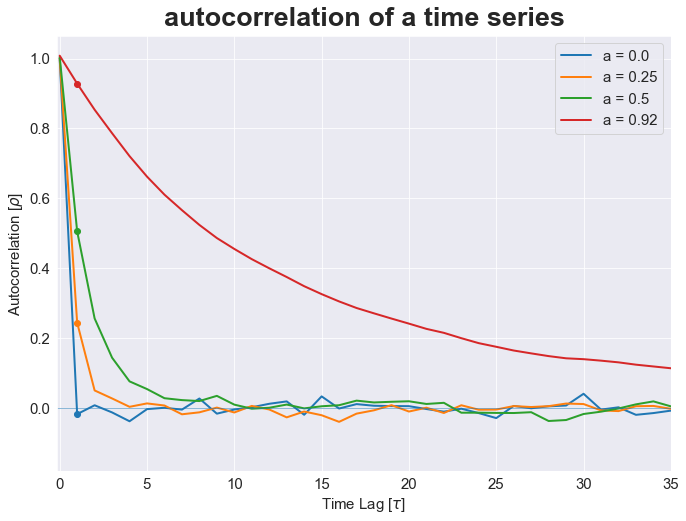

In [2]:
auto_vec = np.array([0, 0.25, 0.5, 0.92])
x1_ts = np.zeros([4,5001])
colors = []
plt.figure(figsize=(11,8))
for ai,a in enumerate(auto_vec):
    b = np.sqrt(1. - a**2)
    
    x1 = []
    x1.append(np.random.normal(loc=0,scale=1.,size=1))
    
    for it in np.arange(0,5000,1):
        x1.append(a*x1[it] + b*np.random.normal(loc=0,scale=1.,size=1))
    x1 = np.asarray(x1)[:,0]
    x1_ts[ai,:] = x1
    
    c = np.correlate(x1,x1,'same')/(np.var(x1)*np.size(x1))
    c = c[int(np.size(c)/2):]

    p = plt.plot(np.arange(0,np.size(c)),c,'-', label='a = ' + str(a))
    clrVal = p[0].get_color()
    colors.append(clrVal)
    # plot autocorr at first time step after 
    plt.plot(1,c[1],'o',color=clrVal) 
plt.axhline(y=0,linewidth=.5)  
plt.xlim(-.15,35)
plt.xlabel(r'Time Lag [$\tau$]')
plt.ylabel(r'Autocorrelation [$\rho$]') 
plt.legend()
plt.title('autocorrelation of a time series')
plt.show()

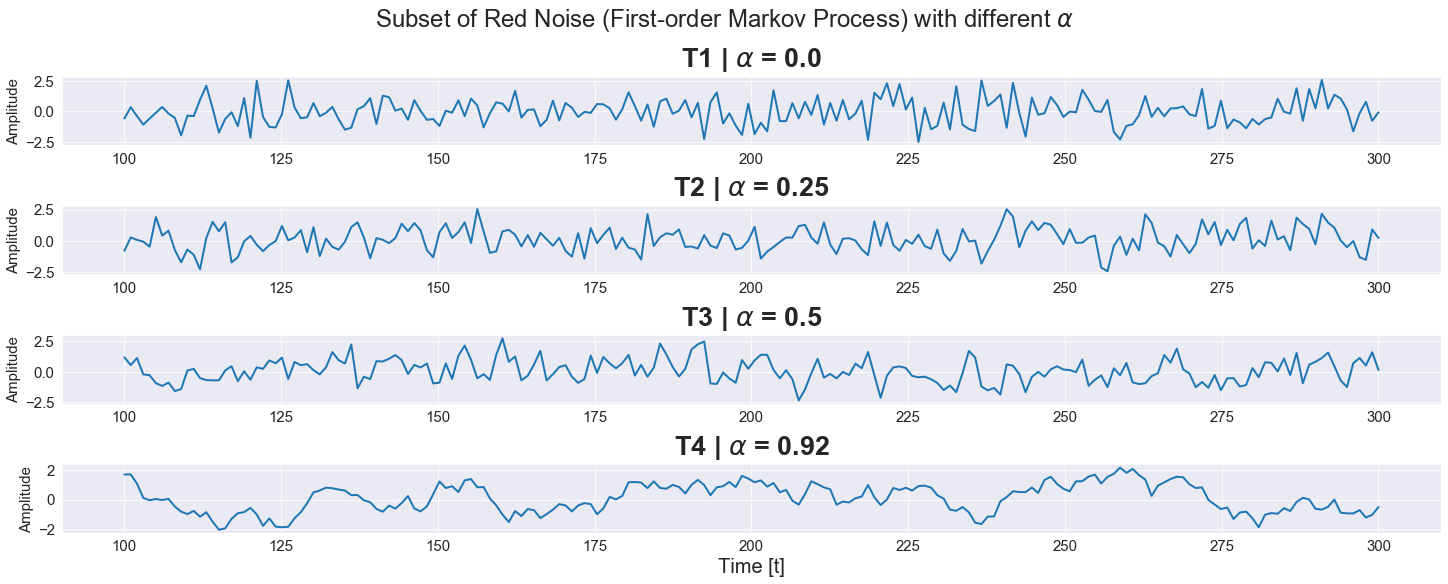

In [56]:
# plot first-order markov TS
ts = ['T1','T2','T3','T4']
fig, axs = plt.subplots(4,1,constrained_layout=True,figsize=(20,8))
for i in np.arange(4):
    axs[i].plot(np.linspace(100,300,200),x1_ts[i,100:300])
    axs[i].set_title(ts[i]+r' | $\alpha$ = '+str(auto_vec[i]))
    axs[i].set_ylabel('Amplitude')
    if i==3:
        axs[i].set_xlabel('Time [t]',size=20)
plt.suptitle(r'Subset of Red Noise (First-order Markov Process) with different $\alpha$');
plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW3/figs/timeseries.png',dpi=400,bbox_inches='tight')

**a)**

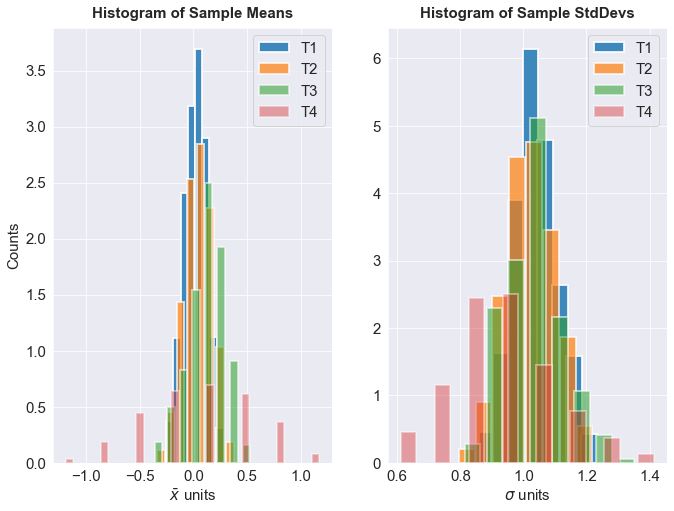

In [22]:
# create arrays 
sample_mean_array = np.zeros([4,5000])
sample_stddev_array = np.zeros([4,5000])
# 100 consectutive samples (measuring persistence)
N=100
fig = plt.figure(figsize=(11,8))
gs1 = gs.GridSpec(1,2,figure=fig)
ax1 = fig.add_subplot(gs1[0,0])
ax2 = fig.add_subplot(gs1[0,1])
alpha=1
nbins = 8
# nbins=np.arange(-2,2.1,0.1)
for i in np.arange(0,4):
    for j in np.arange(0,5000):
#         print(i,j)
        x = np.random.randint(0,5000-N) # end at 4900 b/c N=100
        sample = x1_ts[i,x:x+N]
        sample_mean_array[i,j] = np.mean(sample)
        sample_stddev_array[i,j] = np.std(sample)
        
    hmean = np.histogram(sample_mean_array[i,:],bins=nbins,density=True)
    hstddev = np.histogram(sample_stddev_array[i,:],bins=nbins,density=True)
    
    alpha-=.15
    ax1.bar(hmean[1][1:],hmean[0],alpha=alpha,color=colors[i],linewidth=2,width=0.07,label=ts[i])
    ax2.bar(hstddev[1][1:],hstddev[0],alpha=alpha,color=colors[i],linewidth=2,width=0.05,label=ts[i])
    ax1.legend();ax2.legend()
    # label ax2
    if i==3:
        ax2.set_xlabel(r'$\sigma$ units');ax2.set_title('Histogram of Sample StdDevs',size=15);\
    # label ax1
    if i==3:
        ax1.set_title('Histogram of Sample Means',size=15);ax1.set_xlabel(r'$\bar x$ units');ax1.set_ylabel('Counts')
        
plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW3/figs/1a.png',dpi=400,bbox_inches='tight')

**d. Returning to Problem 1c of Homework 2, re-do the calculations with your results from (a) and (b) of
this homework in mind. Do your conclusions change?**

In [23]:
# calculate average consectuive R>0 days
def find_consec_days(tmp):
    # tmp: array of interest
    count = 1
    count_list = []
    for ind, val in enumerate(tmp[0:-1]):
        if tmp[ind]+1 == tmp[ind+1]:
            count+=1
        else:
            count_list.append(count)
            count=1        
    return count_list

In [24]:
# redo 1c from HW2 but keep in mind persistence 
tmp = pd.read_csv('/Users/tyler/Desktop/SP22/ATS_655/HW2/homework_2_data_R.csv');
precip = np.array(tmp);
tmp = pd.read_csv('/Users/tyler/Desktop/SP22/ATS_655/HW2/homework_2_data_P.csv');
pres = np.array(tmp);

tmp = np.where(precip>0)[0]
count_list = find_consec_days(tmp);
avg_run = round(np.mean(count_list));print('avg_run: ',avg_run)


p_avg = np.mean(pres)

mask = precip>0
n = int(384/3)
samp = np.zeros(5000)
dist = np.zeros(n)
for i in np.arange(0,5000):
    for j in np.arange(0,n): # do this 384/3 times because we're taking average of three consective vals to add to
                             # 384 = N
        x = int(np.random.randint(0,len(pres)-avg_run))
        dist[j] = np.mean(pres[x:x+3])
    samp[i] = np.mean(dist)

avg_run:  3.0


Average Pressure: 846.3326544126041 hPa
Average Pres when R>0: 847.030625 inches


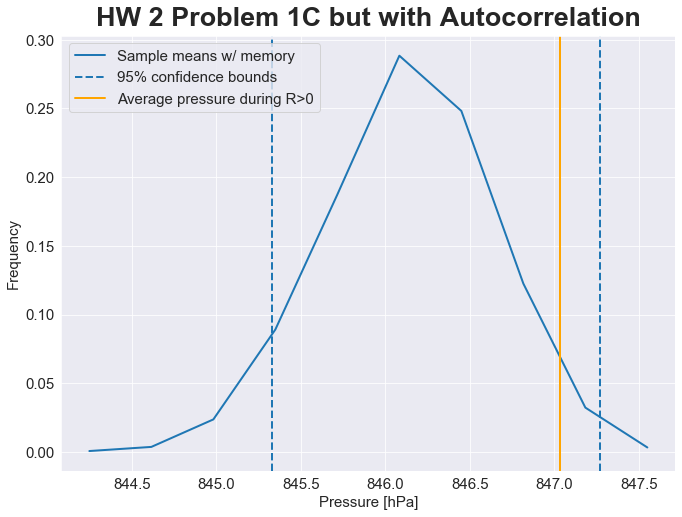

In [25]:
fig=plt.figure(figsize=(11,8))
hsamp = np.histogram(samp)

p_avg = np.mean(pres);print('Average Pressure:', p_avg, 'hPa')
mask = precip>0
presr_avg = np.mean(pres[mask]);print('Average Pres when R>0:', presr_avg, 'inches')


z1 = np.percentile(samp-0.,2.5)
z2 = np.percentile(samp-0.,100.-2.5)

plt.plot(hsamp[1][0:-1],hsamp[0]/np.sum(hsamp[0]),label='Sample means w/ memory')
plt.axvline(z1,linestyle='--',label='95% confidence bounds')
plt.axvline(z2,linestyle='--',label='');
plt.axvline(presr_avg,color='orange',label='Average pressure during R>0');
plt.title('HW 2 Problem 1C but with Autocorrelation');
plt.xlabel('Pressure [hPa]');
plt.ylabel('Frequency');
plt.legend();
plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW3/figs/1d.png',dpi=400,bbox_inches='tight')

**2a)**

In [69]:
ds = xr.open_dataset('/Users/tyler/Desktop/SP22/ATS_655/HW3/SD_hourly_T_z.nc')
lat = 1
lon = 3
ds["z_s"] = (ds.z - np.mean(ds.z))/np.std(ds.z)
ds["t_s"] = (ds.t - np.mean(ds.t))/np.std(ds.t)

In [70]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ds.z_s[:,lat,lon].values,ds.t[:,lat,lon].values)

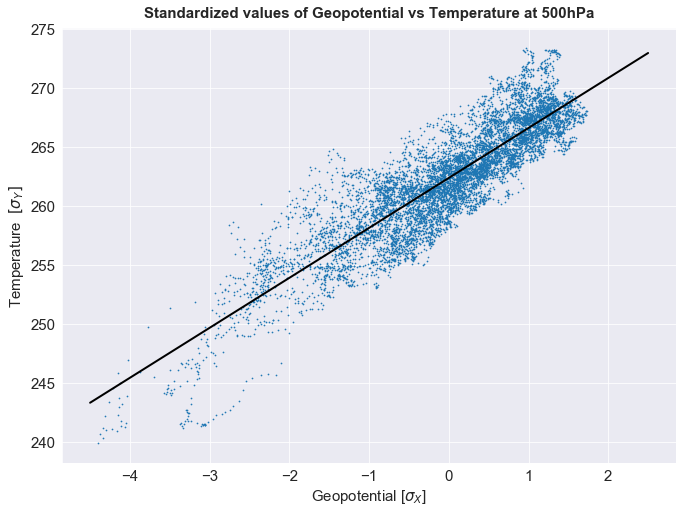

In [71]:
plt.figure(figsize=(11,8))
plt.scatter(ds.z_s[:,lat,lon].data,ds.t[:,lat,lon].data,0.5);
xrange = np.arange(-4.5,3,1)
plt.plot(xrange,intercept+slope*xrange,color='black')
plt.xlabel(r'Geopotential [$\sigma_X $]');plt.ylabel('Temperature $\;[\sigma_Y] $ ');
plt.title('Standardized values of Geopotential vs Temperature at 500hPa',size=15);
plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW3/figs/2a.png',dpi=400,bbox_inches='tight')

**2b)**

In [47]:
# X = geopotential
# Y = temperature
# calc pearson correlation coeff
corr = np.corrcoef(ds.z_s[:,lat,lon].data,ds.t[:,lat,lon].data)[0][1];
print('Correlation coefficient r: ',round(corr,4))
# calculate regression coeff
slope, intercept, r_value, p_value, std_err = stats.linregress(ds.z_s[:,lat,lon].data,ds.t[:,lat,lon].data)
print('Regression coefficient a: ',round(slope,4))
frac_var = r_value**2
print('The fraction of variance in Y explained by X is just the r**2:',round(frac_var,4))

Correlation coefficient r:  0.8843
Regression coefficient a:  4.2348
The fraction of variance in Y explained by X is just the r**2: 0.782


**2c) Estimate the statistical significance of the correlation you compute in (b) - be sure to consider auto-
correlation/memory when determining your degrees of freedom.**

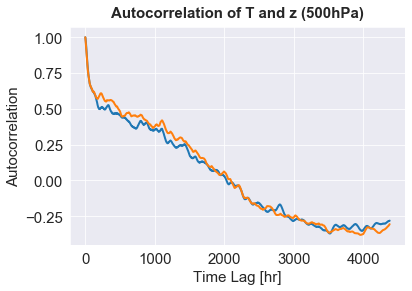

In [72]:
fig = plt.figure()
z_rho = np.correlate(ds.z_s[:,lat,lon].data,ds.z_s[:,lat,lon].data,'same')\
                 /(np.var(ds.z_s[:,lat,lon].data)*np.size(ds.z_s[:,lat,lon].data))
z_rho = z_rho[int(np.size(z_rho)/2):]
t_rho = np.correlate(ds.t_s[:,lat,lon].data,ds.t_s[:,lat,lon].data,'same')\
                /(np.var(ds.t_s[:,lat,lon].data)*np.size(ds.t_s[:,lat,lon].data))
t_rho = t_rho[int(np.size(t_rho)/2):]
plt.plot(np.arange(0,np.size(z_rho)),z_rho,'-',label='z_s')
plt.plot(np.arange(0,np.size(t_rho)),t_rho,'-',label='t_s')
plt.title('Autocorrelation of T and z (500hPa)',size=15)
plt.xlabel('Time Lag [hr]');plt.ylabel('Autocorrelation')
plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW3/figs/2c.png',dpi=200,bbox_inches='tight')

In [52]:
# find index where rho is closest to zero.
min_ind = np.abs(c-0.).argmin()
N = round(len(ds.time),1)
N_star = len(ds.time)/2000
N_star = round(N_star,1)
t_statistic0 = (corr*np.sqrt(N-2))/np.sqrt(1-corr**2);
print(t_statistic0)
t_statistic1 = (corr*np.sqrt(N_star-2))/np.sqrt(1-corr**2);
print(t_statistic1)

177.26479508903887
2.9344427663247274


We see a higher t_statistic with our N (not incorporating memory), which says our finding is extremely rare and we reject the null.
However will our effective N our, t_statistic is much lower.

**2d)**

Using composite analysis, calculate the mean (or median) Y value for samples when X exceeds +1
standard deviation. Repeat for when X is smaller than -1 standard deviation. Can you estimate the
statistical significance of both values? If yes, do it. If not, why not?

In [53]:
mask1 = ds.z_s[:,lat,lon]>=1;mask
meanY_pos = np.mean(ds.t[:,lat,lon].values[mask1])
mask2 = ds.z_s[:,lat,lon]<=1;mask
meanY_neg = np.mean(ds.t[:,lat,lon].values[mask2])
### do statistical significance of these values!

ss_pos = (meanY_pos - np.mean(ds.t[:,lat,lon]))/np.std(ds.t[:,lat,lon])
print(float(ss_pos))
ss_neg = (meanY_neg - np.mean(ds.t[:,lat,lon]))/np.std(ds.t[:,lat,lon])
print(float(ss_neg))

#Since these values are not out of the t_crit range, they are not statistically significant.

1.1046598021558247
-0.22002326205600786


My degrees of freedom is: $\nu = N^* - 2$
N* = 4 
$\nu$ = 2
and assuming $\alpha$ = 0.05, 
t_crit = 2.92

**3a)**

In [60]:
def compute_rmse(x1,x2,n):
    RSME = np.sqrt(1/n*np.sum((x1 - x2)**2))
    return RSME
def compute_mae(x1,x2,n):
    MAE = 1/n * np.sum(np.abs(x1 - x2))
    return MAE

In [61]:
ds = pd.read_csv('/Users/tyler/Desktop/SP22/ATS_655/HW3/NHC_data_hw3.csv',header=None).to_numpy()
# truth | NHC forecast
RMSE = compute_rmse(x1=ds[:,0],x2=ds[:,1],n=len(ds));print(RMSE,'kts')
MAE = compute_mae(x1=ds[:,0],x2=ds[:,1],n=len(ds));print(MAE,'kts')

18.905686975087683 kts
13.935 kts


In [62]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ds[:,1],ds[:,0])
print('OLS slope and intercept:',slope, intercept)

OLS slope and intercept: 0.9233274223677421 7.101643872679574


**3b)**

(i) How do you interpret the regression coefficients and what do the values say about NHC forecasts?

(ii) What is the RMSE of the predictions made from this OLS best-fit line?

(iii) What is the MAE of the predictions made from this OLS best-fit line?

In [63]:
# ii What is the RSME pof the predictions? prediction -> RHS, where LHS is the truth
RMSE_lsq = compute_rmse(x1=ds[:,0],x2=(intercept + slope*ds[:,1]),n=len(ds));print(RMSE_lsq,'kts')
# iii
MAE_lsq = compute_mae(x1=ds[:,0],x2=(intercept + slope*ds[:,1]),n=len(ds));print(MAE_lsq,'kts')

18.669065031985316 kts
14.033070755493267 kts


**3c)**

(i) What is the RMSE of the predictions made from the LAD best-fit line?

(ii) What is the MAE of the predictions made from the LAD best-fit line?

(iii) Make a scatterplot of the forecasts and observations from the csv file and plot the OLS and LAD
regression lines on the same plot. How do they differ?

In [64]:
# i
slope_LAD = 1.0000
intercept_LAD = 4.182e-6
RMSE_lad = compute_rmse(x1=ds[:,0],x2=(intercept_LAD + slope_LAD*ds[:,1]),n=len(ds));print(RMSE_lad,'kts')
# ii
MAE_lad = compute_mae(x1=ds[:,0],x2=(intercept_LAD + slope_LAD*ds[:,1]),n=len(ds));print(MAE_lad,'kts')

18.905686438670177 kts
13.935000150552 kts


OLS slope and intercept: 0.9233274223677421 7.101643872679574


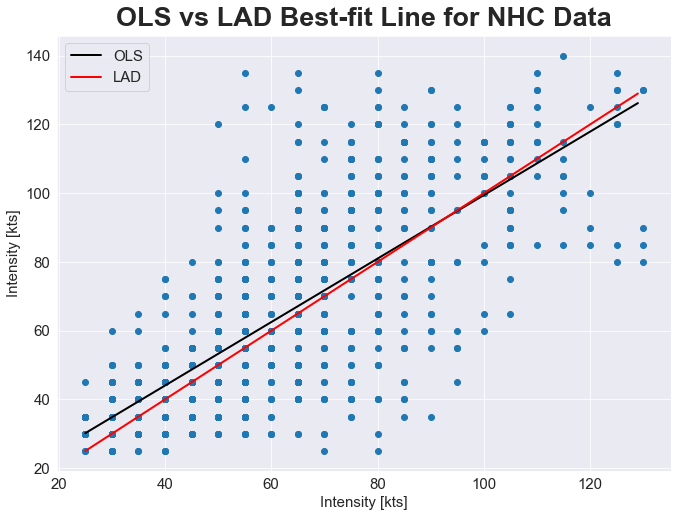

In [66]:
# iii
# do not need to standardize if same units
# ds[:,1] = NHC forecast
# ds[:,0] = truth
# slope, intercept, r_value, p_value, std_err = stats.linregress(ds[:,0],ds[:,1])

print('OLS slope and intercept:',slope, intercept)

fig = plt.figure(figsize=(11,8))
# x = np.arange(20,140,1)
x = np.arange(int(np.min(ds[:,1])),int(np.max(ds[:,1])))
plt.scatter(ds[:,1],ds[:,0])
plt.plot(x,intercept+x*slope,color='black',label='OLS');
# plt.axline([0,intercept],slope=slope,label='OLS')
plt.plot(x,intercept_LAD + x*slope_LAD,color='red',label='LAD')
plt.legend();
plt.title('OLS vs LAD Best-fit Line for NHC Data');
plt.xlabel('Intensity [kts]');plt.ylabel('Intensity [kts]');
plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW3/figs/3c.png',dpi=200,bbox_inches='tight')

**3d)** 

Add these pairs of verifications/forecasts to your dataset and recalculate the best fit OLS line. The
best-fit LAD line with this “new” hurricane included is α1 = 1.0000 and α0 = 5.484e − 06. What can
you conclude about the sensitivity of each approach to outliers?

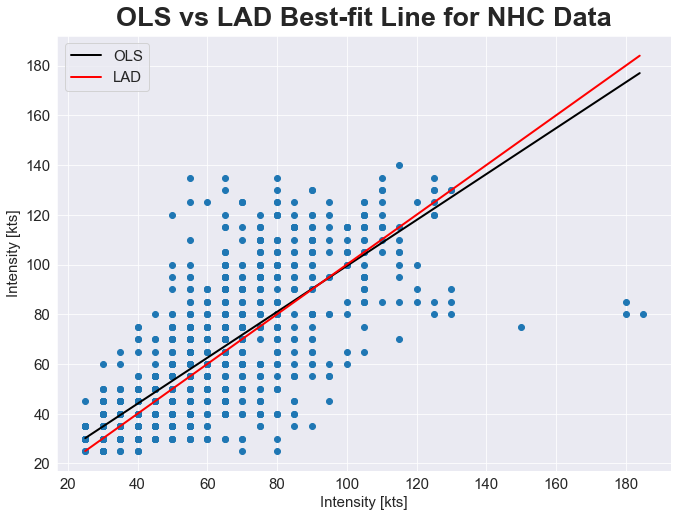

In [67]:
ds = pd.read_csv('/Users/tyler/Desktop/SP22/ATS_655/HW3/NHC_data_hw3.csv',header=None).to_numpy()
new_data = np.array([[70,90],[70,115],[75,150],[80,180],[80,185],[85,180]])
ds = np.append(ds,new_data)
ds = ds.reshape(1006,2)
# recalculate OLS line with new data 
# slope, intercept, r_value, p_value, std_err = stats.linregress(ds[:,0],ds[:,1])

# new slope and intercept for part d
slope_LAD = 1.0000
intercept_LAD = 5.484e-6
# recalculate OLS best fit line
fig = plt.figure(figsize=(11,8))
# x = np.arange(20,140,1)
x = np.arange(int(np.min(ds[:,1])),int(np.max(ds[:,1])))

plt.scatter(ds[:,1],ds[:,0])
plt.plot(x,intercept+x*slope,color='black',label='OLS');
plt.plot(x,intercept_LAD + x*slope_LAD,color='red',label='LAD')
plt.legend();
plt.title('OLS vs LAD Best-fit Line for NHC Data');
plt.xlabel('Intensity [kts]');plt.ylabel('Intensity [kts]');
plt.savefig('/Users/tyler/Desktop/SP22/ATS_655/HW3/figs/3d.png',dpi=200,bbox_inches='tight')

In [41]:
print('OLS slope and intercept:',slope, intercept,' with new outlier data')

OLS slope and intercept: 0.9233274223677421 7.101643872679574  with new outlier data


without new outlier data: OLS slope and intercept: 0.6033332449983175 22.746752343950455


- We see an increase in slope and decrease in slope with the new outlier data.
